<!DOCTYPE html>
<html>
<body>
<div align="center">
<h3>Made by Manthan A Panchal</h3>
    
<h1>Recommendation Engine</h1>

<h3>Follow Me on - <a href="https://www.linkedin.com/in/manthan-panchal-046b3b198/">LinkedIn</a>&nbsp; 
</div>

</div>
</body>
</html>

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd 
import seaborn as sns

from sklearn.model_selection import KFold, cross_val_score
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import train_test_split

pd.set_option('Display.max_rows', None)
plt.style.use('seaborn-darkgrid')

In [2]:
df = pd.read_csv('glass.csv')
df

,RI,Na,Mg,Al,Si,K,Ca,Ba,Fe,Type
0,1.52101,13.64,4.49,1.10,71.78,0.06,8.75,0.00,0.00,1
1,1.51761,13.89,3.60,1.36,72.73,0.48,7.83,0.00,0.00,1
2,1.51618,13.53,3.55,1.54,72.99,0.39,7.78,0.00,0.00,1
3,1.51766,13.21,3.69,1.29,72.61,0.57,8.22,0.00,0.00,1
4,1.51742,13.27,3.62,1.24,73.08,0.55,8.07,0.00,0.00,1
5,1.51596,12.79,3.61,1.62,72.97,0.64,8.07,0.00,0.26,1
6,1.51743,13.30,3.60,1.14,73.09,0.58,8.17,0.00,0.00,1
7,1.51756,13.15,3.61,1.05,73.24,0.57,8.24,0.00,0.00,1
8,1.51918,14.04,3.58,1.37,72.08,0.56,8.30,0.00,0.00,1
9,1.51755,13.00,3.60,1.36,72.99,0.57,8.40,0.00,0.11,1


### Initial EDA

In [3]:
df.shape

(214, 10)

In [4]:
df.isnull().sum()

RI      0
Na      0
Mg      0
Al      0
Si      0
K       0
Ca      0
Ba      0
Fe      0
Type    0
dtype: int64

In [5]:
print(df.Type.unique())

[1 2 3 5 6 7]


In [6]:
df.Type.replace(to_replace=5, value=4, inplace=True)
df.Type.replace(to_replace=6, value=5, inplace=True)
df.Type.replace(to_replace=7, value=6, inplace=True)

In [7]:
print(df.Type.unique())

[1 2 3 4 5 6]


In [8]:
df.Type = df.Type.astype('category')

In [9]:
df.describe(include='all')

,RI,Na,Mg,Al,Si,K,Ca,Ba,Fe,Type
count,214.000000,214.000000,214.000000,214.000000,214.000000,214.000000,214.000000,214.000000,214.000000,214.0
unique,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,6.0
top,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2.0
freq,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,76.0
mean,1.518365,13.407850,2.684533,1.444907,72.650935,0.497056,8.956963,0.175047,0.057009,NaN
std,0.003037,0.816604,1.442408,0.499270,0.774546,0.652192,1.423153,0.497219,0.097439,NaN
min,1.511150,10.730000,0.000000,0.290000,69.810000,0.000000,5.430000,0.000000,0.000000,NaN
25%,1.516523,12.907500,2.115000,1.190000,72.280000,0.122500,8.240000,0.000000,0.000000,NaN
50%,1.517680,13.300000,3.480000,1.360000,72.790000,0.555000,8.600000,0.000000,0.000000,NaN
75%,1.519157,13.825000,3.600000,1.630000,73.087500,0.610000,9.172500,0.000000,0.100000,NaN


In [10]:
values = df.values
values

array([[ 1.52101, 13.64   ,  4.49   , ...,  0.     ,  0.     ,  1.     ],
       [ 1.51761, 13.89   ,  3.6    , ...,  0.     ,  0.     ,  1.     ],
       [ 1.51618, 13.53   ,  3.55   , ...,  0.     ,  0.     ,  1.     ],
       ...,
       [ 1.52065, 14.36   ,  0.     , ...,  1.64   ,  0.     ,  6.     ],
       [ 1.51651, 14.38   ,  0.     , ...,  1.57   ,  0.     ,  6.     ],
       [ 1.51711, 14.23   ,  0.     , ...,  1.67   ,  0.     ,  6.     ]])

In [11]:
X = values[:,[0,1,2,3,5,6,7,8]]
Y = values[:,-1]

In [12]:
X_train, X_test, y_train, y_test = train_test_split(
...     X, Y, test_size=0.30, random_state = 2)

### Model Test  Build

In [13]:
model = KNeighborsClassifier(n_neighbors = 5, weights = 'uniform' )

In [15]:
model.fit(X_train, y_train)

KNeighborsClassifier()

In [16]:
model.predict(X_test)

array([1., 1., 6., 1., 1., 4., 1., 6., 2., 1., 2., 2., 5., 1., 2., 1., 2.,
       2., 1., 6., 4., 2., 4., 1., 6., 6., 1., 1., 2., 3., 2., 2., 2., 2.,
       1., 1., 2., 1., 2., 3., 1., 2., 2., 2., 6., 1., 2., 1., 2., 2., 1.,
       4., 2., 5., 1., 5., 2., 2., 2., 2., 6., 1., 2., 2., 3.])

In [18]:
model.score(X_test, y_test)

0.676923076923077

### Hyper-Parameter Tuning

In [21]:
grid_params = {'n_neighbors':np.arange(2,50), 
                 'weights':['uniform', 'distance'], 'metric':['euclidean', 'manhattan']}

gs = GridSearchCV(
      KNeighborsClassifier(),
      grid_params,
      verbose=1,
      cv = 3,
      n_jobs=-1)
gs_results = gs.fit(X_train, y_train)

Fitting 3 folds for each of 192 candidates, totalling 576 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:    2.4s
[Parallel(n_jobs=-1)]: Done 576 out of 576 | elapsed:    2.8s finished


In [22]:
gs.best_score_

0.7251700680272108

In [23]:
gs.best_estimator_

KNeighborsClassifier(metric='euclidean', n_neighbors=3)

In [24]:
gs.best_params_

{'metric': 'euclidean', 'n_neighbors': 3, 'weights': 'uniform'}

### Final model

In [25]:
MODEL = KNeighborsClassifier(n_neighbors = 3, weights = 'uniform', metric='euclidean' )
MODEL.fit(X_train, y_train)

KNeighborsClassifier(metric='euclidean', n_neighbors=3)

In [34]:
predicted = MODEL.predict(X_test)
actual = y_test


### Visualizing it

Text(0.5, 0, 'Iron')

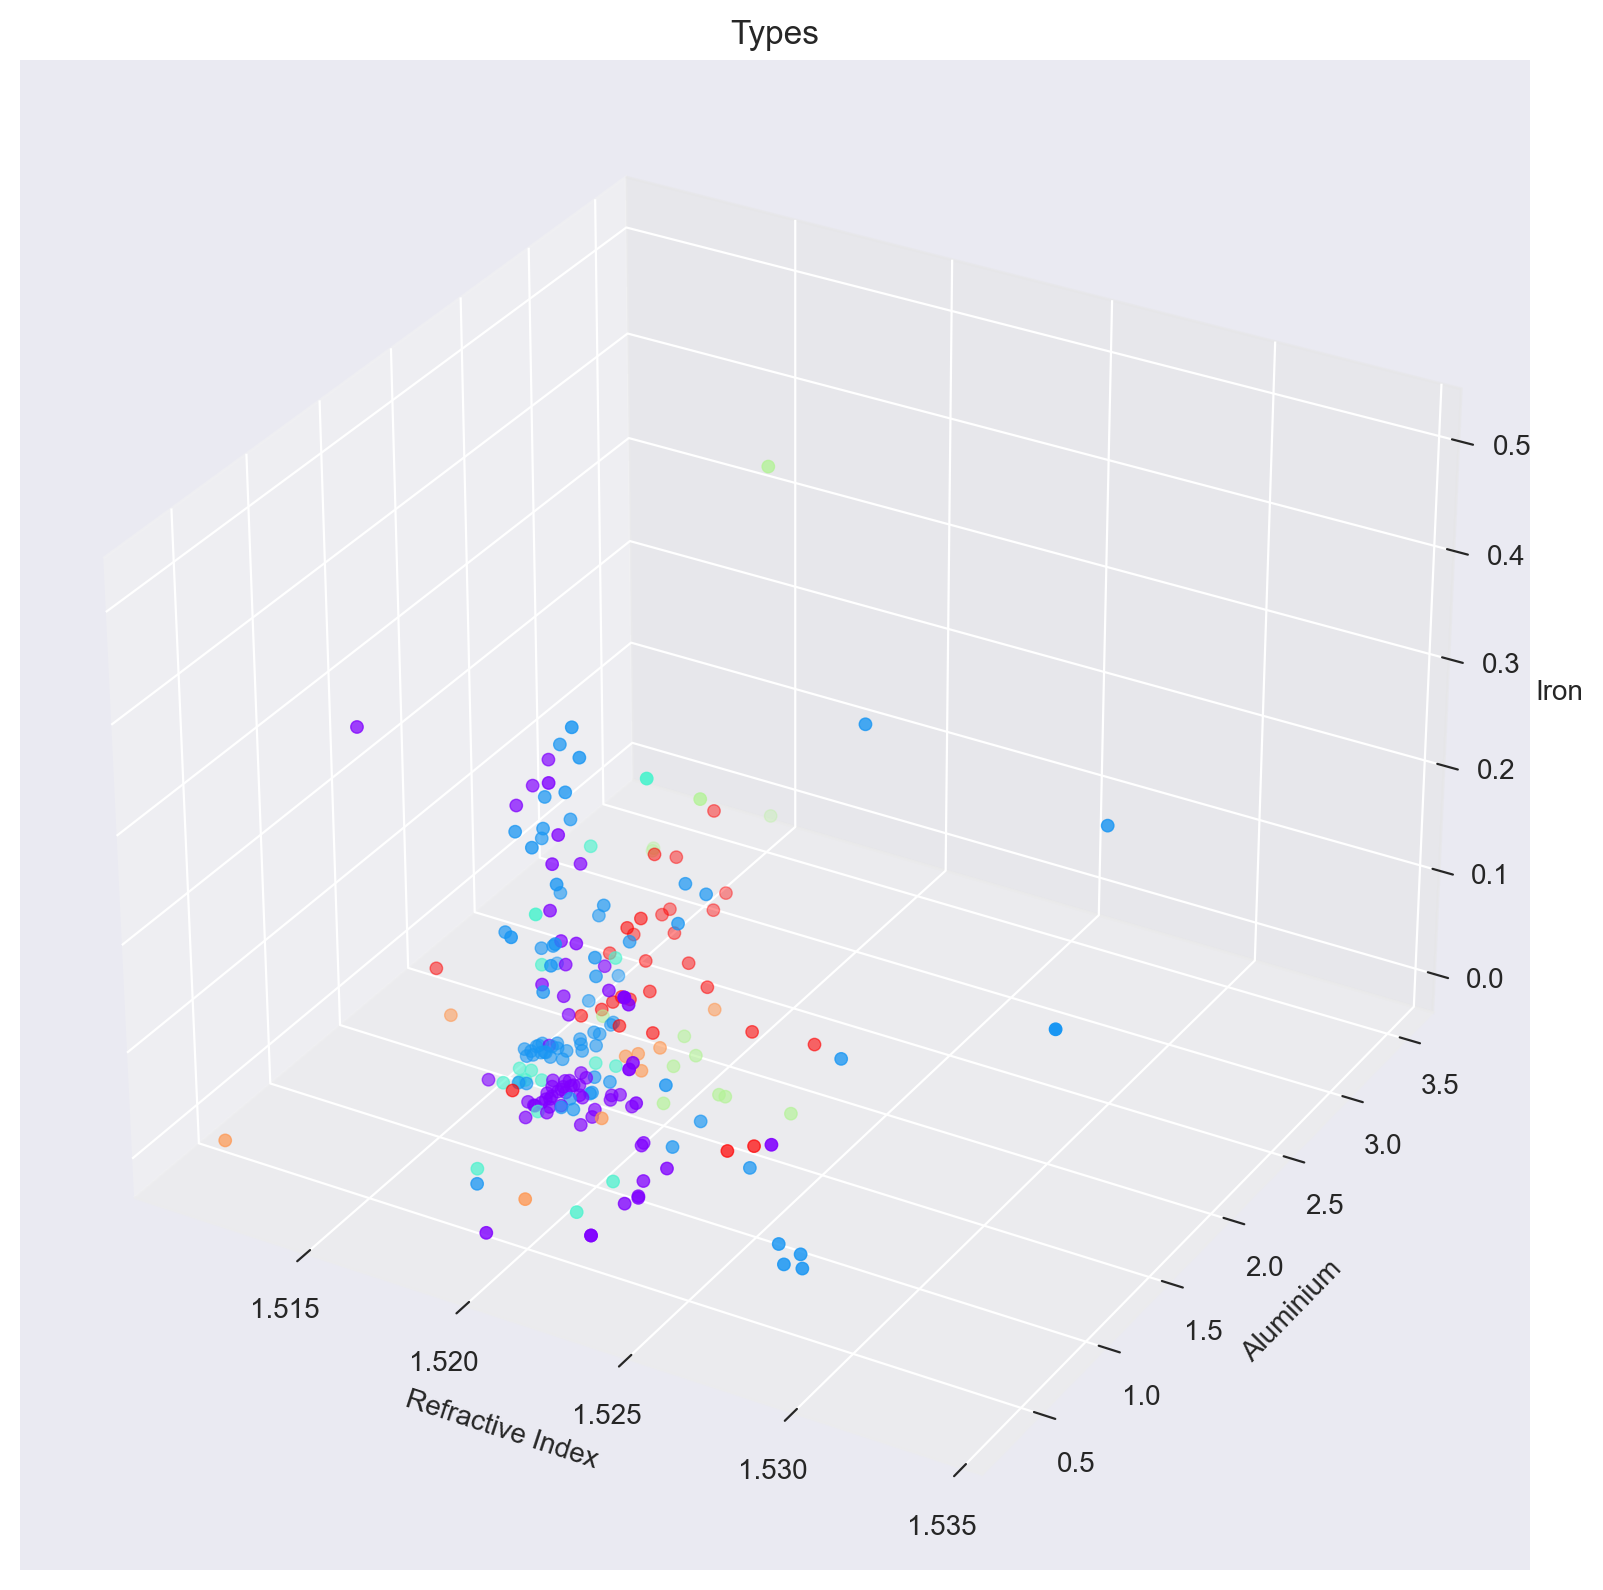

In [52]:
plt.figure(figsize=(10,10), dpi=200)

ax = plt.axes(projection ='3d')
ax.scatter3D(df.RI, df.Al, df.Fe, c = df.Type, cmap='rainbow', linewidth=0.5)
ax.set_title('Types')
ax.set_xlabel('Refractive Index')
ax.set_ylabel('Aluminium')
ax.set_zlabel('Iron')